# Q-Learning Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class TwoStateEnv(object):
    # Class that defines the environment with reward 0 and 1 with probability p.

    def __init__(self, num_state = 2, num_action = 2):
        self.num_state = num_state
        self.num_action = num_action
        self.actions = np.arange(self.num_action)     # define set of actions



    def reward(self, action, state):
        if state == 0:
            if action == 0:
                return 1
            else:
                return 10
        elif state == 1:
            if action == 0:
                return 0
            else:
                return -15

    def next_state(self, action, state):
      if state == 0:
          if action == 0:
              return 0
          else:
              return 1
      elif state == 1:
          if action == 0:
              return 1
          else:
              return 0
          

class QLearning(object):
    # Class that implements Q-learning.
    def __init__(self, env, episodes, n_steps,  gamma=0.9, epsilon=0.1):
        self.env = env
        self.num_state = env.num_state
        self.num_action = env.num_action
        self.actions = env.actions
        self.n_steps = n_steps
        # self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.Q = np.zeros((self.num_state, self.num_action))
        self.Q_terminal = np.zeros(self.num_action)
        self.initial_state = np.random.randint(self.num_state)

    def Learning(self):
        for i in range(self.episodes):
          state = np.random.randint(self.num_state)

          for t in range(self.n_steps):
            if np.random.rand() < self.epsilon:
              action = np.random.choice(self.actions)
            else:
              action = np.argmax(self.Q[state])

            next_state = self.env.next_state(action, state)
            reward = self.env.reward(action, state)

            self.Q[state, action] += (1/(t+1)) * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[state, action])
            state = next_state

        return self.Q

### Algorithm application

[[  1.  10.]
 [  0. -15.]]
[[  2.11111111  10.        ]
 [  0.         -13.88888889]]
[[  3.22222222  10.        ]
 [  0.         -12.77777778]]
[[  4.33333333  10.        ]
 [  0.         -11.66666667]]
[[  5.44444444  10.        ]
 [  0.         -10.55555556]]
[[ 6.55555556 10.        ]
 [ 0.         -9.44444444]]
[[ 7.66666667 10.        ]
 [ 0.         -8.33333333]]
[[ 8.77777778 10.        ]
 [ 0.         -7.22222222]]
[[ 9.88888889 10.        ]
 [ 0.         -6.11111111]]
[[42149.91917416 42121.6223828 ]
 [41979.78011728 42131.41388832]]
[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0)]
[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1)]


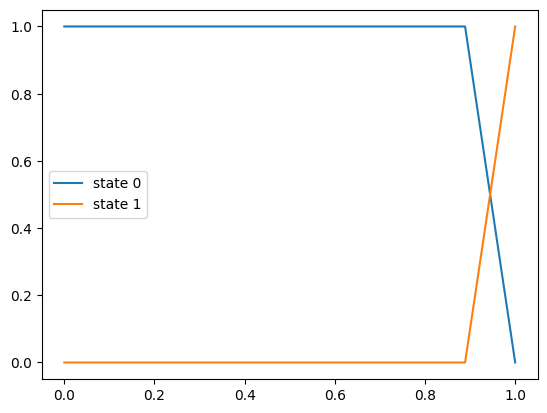

In [2]:
gammas = np.linspace(0,1, 10)
plt.figure()
state_0 = []
state_1 = []

for gamma in gammas:
  env = TwoStateEnv()
  q_learning = QLearning(env, n_steps= 100, episodes = 10000, gamma=gamma)
  Q = q_learning.Learning()

  state_0.append(np.argmax(Q[0]))
  state_1.append(np.argmax(Q[1]))

  print(Q)

print(state_0)
print(state_1)

plt.plot(gammas,state_0, label = "state 0")
plt.plot(gammas,state_1, label = "state 1")
plt.legend()
plt.show()

